In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
t = 5

In [3]:
nestle_stock_prices_dict = {}
nestle_stock_prices_df = pd.read_csv("nestle.csv")
nestle_stock_prices_df = nestle_stock_prices_df.iloc[::-1]
nestle_stock_prices_df = nestle_stock_prices_df.set_index("Date")


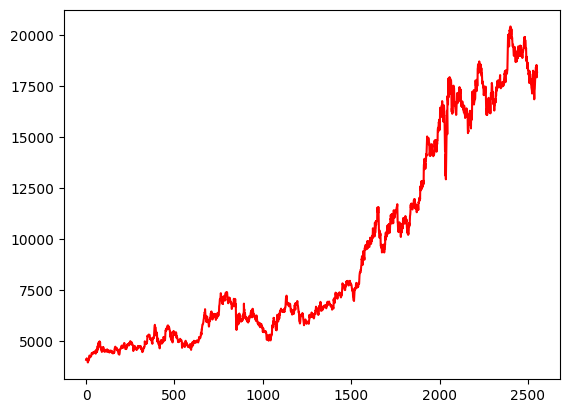

In [4]:
plt.plot(list(nestle_stock_prices_df["Close Price"]), c="red")

In [5]:
for datestr, price in nestle_stock_prices_df["Close Price"].items():
    nestle_stock_prices_dict[datetime.strptime(datestr, "%d-%B-%Y").date()] = price

In [6]:
distribution = []
for date in nestle_stock_prices_dict:
    if date + timedelta(days=t) in nestle_stock_prices_dict:
        distribution.append(np.log(nestle_stock_prices_dict[date + timedelta(days=t)] / nestle_stock_prices_dict[date]))

len(distribution)

1462

In [7]:
normal_distribution = stats.norm.rvs(loc=np.mean(distribution), scale=np.std(distribution), size=100 * len(distribution))

In [8]:
np.mean(normal_distribution), np.var(normal_distribution), np.mean(distribution), np.var(distribution)

(np.float64(0.0008078986600591176),
 np.float64(0.000587562459210944),
 np.float64(0.0008398981479846311),
 np.float64(0.0005868152779914395))

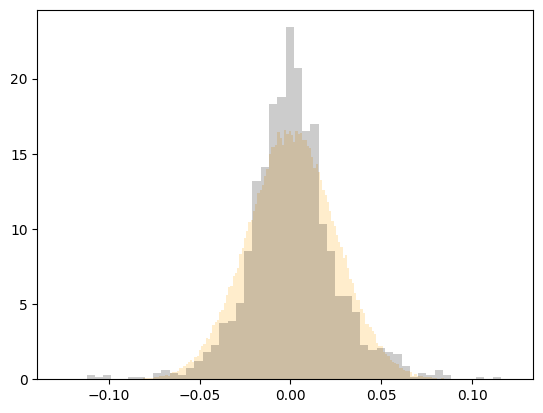

In [9]:
plt.hist(normal_distribution, color="orange", density=True, bins="auto", histtype="stepfilled", alpha=0.2)
plt.hist(distribution, color="black", density=True, bins="auto", histtype="stepfilled", alpha=0.2)
plt.show()